<a href="https://colab.research.google.com/github/GerardoMunoz/AlgLin_2025/blob/main/Producto_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import sympy as sp
#from ubogsla18p import *
#x,y=symbols('x y')
#o2=Matrix([0,0])
#imprimir('o2=',o2)

def ejes3d(x0,x1,y0,y1,z0,z1):
    #fig=plt.figure(figsize=(8,6),dpi=80)
    #ax = plt.Axes(fig,[0.,0.,1.,1.])
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_xlim([x0,x1])
    ax.set_ylim([y0,y1])
    ax.set_zlim([z0,z1])
    return ax

def flecha3d(ax,A:sp.Matrix,B:sp.Matrix=None,nombres=None,fontsize=15,**kwargs):#problemas en 2D
    if B==None:
        B=sp.zeros(*A.shape)
    elif A.shape!=B.shape:
        raise ValueError('flechas(ax,A) o flechas(ax,A,B) y A y B son del mismo tamaño')

    if isinstance(nombres,str):
        if A.cols==1:
            nombres=[nombres]
        else:
            nombres=[nombres+str(i) for i in range(A.cols)]
    elif (isinstance(nombres,list)) and (len(nombres)!=A.cols):
        raise ValueError('flechas(ax,A) o flechas(ax,A,n) y n="v" o  len(n)!=A.cols')
    elif not isinstance(nombres,list) and nombres!=None:
        raise ValueError('n es str o list')

    if A.rows==2:
        #v=A.col(0)
        #sumar=B.col(0)
        #ax.arrow(float(sumar[0]),float(sumar[1]),float(v[0]),float(v[1]),head_width=0.02,head_length=0.02, length_includes_head=True,**kwargs)
        #if nombre!='':
        #    ax.text(v[0]+sumar[0],v[1]+sumar[1],nombre,fontsize=fontsize)
        ax.quiver(B.row(0),B.row(1),A.row(0),A.row(1),**kwargs)
        if nombres!= None:
            for i in range(A.cols):
                ax.text(A.row(0)[i]+B.row(0)[i],A.row(1)[i]+B.row(1)[i],nombres[i],fontsize=fontsize)

    elif A.rows==3:
        #AT=A.T
        ax.quiver(B.row(0),B.row(1),B.row(2),A.row(0),A.row(1),A.row(2),**kwargs)
        if nombres!= None:
            for i in range(A.cols):
                ax.text(A.row(0)[i]+B.row(0)[i],A.row(1)[i]+B.row(1)[i],A.row(2)[i]+B.row(2)[i],nombres[i],fontsize=fontsize)
    else:
        raise ValueError('Sólo imprime matrices de 2 o 3 renglones')


def juntar(*columnas):# apilar para col_join
    A=columnas[0]
    for columna in columnas[1:]:
        A=A.row_join(columna)
    return A

 # Vector Cruzado (en 2D)

 Si $\vec{u}=\begin{bmatrix}u_0\\u_1\end{bmatrix}$ entonces definimos **el vector cruzado**
 $$\begin{bmatrix}u_0\\u_1\end{bmatrix}^\times:=\begin{bmatrix}u_1\\-u_0\end{bmatrix}$$


Se puede verificar que $\vec{u}\cdot\vec{u}^\times==0$ y que ambos vectores tienen la misma norma. Aunque es de resaltar que $\vec{u}^\times$ no es el único vector que cumple estas dos propiedades.

# Producto Cruz (en 3D)

El producto cruz de dos vectores $\vec{u}=\begin{bmatrix}u_0\\u_1\\u_2\end{bmatrix}$ y  $\vec{v}=\begin{bmatrix}v_0\\v_1\\v_2\end{bmatrix}$  es  el siguiente vector $\vec{w}=\vec{u} \times \vec{v}=\begin{bmatrix}w_0\\w_1\\w_2\end{bmatrix}$ perpendicular a los otros dos vectores, lo cual implica que $w \cdot u=0$ y que $w \cdot v=0$. Esto genera un sistema de dos ecuaciones y tres variables ($w_0$, $w_1$ y $w_2$).

$$\begin{aligned}
u_0 w_0 + u_1 w_1 + u_2 w_2 =& 0 \\
v_0 w_0 + v_1 w_1 + v_2 w_2 =& 0 \\
\end{aligned}
\begin{bmatrix}
u_0 & u_1 & u_2 & : & 0\\
v_0 & v_1 & v_2 & : & 0
\end{bmatrix}$$

suponiendo que $u_0 \neq 0$

$\begin{bmatrix}
u_0 & u_1 & u_2 & : & 0\\
v_0 & v_1 & v_2 & : & 0
\end{bmatrix}$
$\frac{1}{u_0}r0 \rightarrow r0$
$\begin{bmatrix}
1 & \frac{u_1}{u_0} & \frac{u_2}{u_0} & : & 0\\
v_0 & v_1 & v_2 & : & 0
\end{bmatrix}$
$-v_0 r_0 + r_1 \rightarrow r_1$
$\begin{bmatrix}
1 & \frac{u_1}{u_0} & \frac{u_2}{u_0} & : & 0\\
0 & v_1 - v_0 \frac{u_1}{u_0} & v_2 - v_0 \frac{u_2}{u_0} & : & 0
\end{bmatrix}$

$w_2$ es la única variable libres. Por lo tanto, se le asigna un parámetro $t$
$$ w_2=t$$
y despejando las variables delanteras se obtiene
\begin{align}
w_1
&=\frac{ -\left(v_2 - v_0 \frac{u_2}{u_0}\right)t}{v_1 - v_0 \frac{u_1}{u_0}}\\
&=\frac{ -\left(v_2u_0 - v_0 u_2\right)t}{v_1u_0 - v_0 u_1}\\
w_0
&=-\left(\frac{u_2}{u_0}\right)t -\left(\frac{u_1}{u_0}\right)\left(\frac{ -\left(v_2u_0 - v_0 u_2\right)t}{v_1u_0 - v_0 u_1}\right)\\
&=\frac{-u_2(v_1u_0 - v_0 u_1)+u_1(v_2u_0 - v_0 u_2)}{u_0(v_1u_0 - v_0 u_1)}t\\
&=\frac{-u_2 v_1 u_0 + u_2 v_0 u_1+u_1 v_2 u_0 - u_1 v_0 u_2}{u_0(v_1u_0 - v_0 u_1)}t\\
&=\frac{-u_2 v_1 u_0 +u_1 v_2 u_0 }{u_0(v_1u_0 - v_0 u_1)}t\\
&=\frac{-u_2 v_1 +u_1 v_2}{v_1u_0 - v_0 u_1}t\\
\end{align}

La solución general del sistema es
$$\vec{w}=t\begin{bmatrix}
\frac{-u_2 v_1 +u_1 v_2}{v_1u_0 - v_0 u_1}\\
\frac{ -v_2u_0 + v_0 u_2}{v_1u_0 - v_0 u_1}\\
1
\end{bmatrix}$$
Al hacer $t=v_1u_0 - v_0 u_1$ se eliminan los denominadores y hace más sencilla las expresiones.


\begin{align}\begin{bmatrix}u_0\\u_1\\u_2\end{bmatrix} \times \begin{bmatrix}v_0\\v_1\\v_2\end{bmatrix}
=&\begin{bmatrix}u_1 v_2- u_2v_1\\-( u_0 v_2 - u_2 v_0)\\u_0 v_1- u_1 v_0\end{bmatrix}\\
\end{align}
Observe que los signos se intercalan y que cada renglón corresponde a multiplicar en cruz eliminando el renglón correspondiente.

<!--  =&\begin{bmatrix}
\begin{vmatrix}u_1 & v_1 \\ u_2 & v_2 \end{vmatrix}\\
-\begin{vmatrix}u_0 & v_0 \\ u_2 & v_2 \end{vmatrix}\\
\begin{vmatrix}u_0 & v_0 \\ u_1 & v_1 \end{vmatrix}
\end{bmatrix} -->



## Ejemplo:

Calcule el producto cruz de los vectores
$ \vec{u}=\begin{bmatrix}6\\5\\2\end{bmatrix}$ y $\vec{v}=\begin{bmatrix}1\\4\\3\end{bmatrix} $

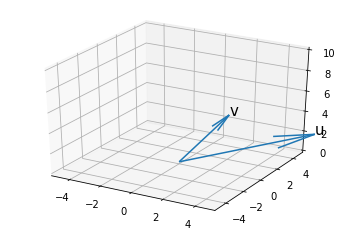

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

u=sp.Matrix([6,5,2])
v=sp.Matrix([1,4,3])

ax=ejes3d(-5,5,-5,5,0,10)
flecha3d(ax,u.row_join(v),nombres=['u','v'])
plt.show()



$ \begin{bmatrix}6\\5\\2\end{bmatrix} \times\begin{bmatrix}1\\4\\3\end{bmatrix}  = \begin{bmatrix}5(3)-2(4)\\-(6(3)-2(1))\\6(4)-5(1)\end{bmatrix}
=\begin{bmatrix}15-8\\-(18-2)\\24-5\end{bmatrix}=\begin{bmatrix}7\\-16\\19\end{bmatrix}$



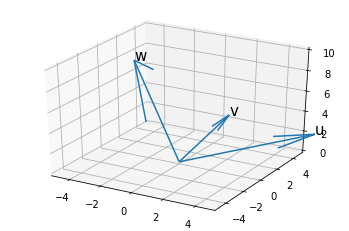

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#u=sp.Matrix([3,1,1])
#v=sp.Matrix([1,3,1])
u=sp.Matrix([6,5,2])
v=sp.Matrix([1,4,3])
w=u.cross(v)

ax=ejes3d(-5,5,-5,5,0,10)
flecha3d(ax,u.row_join(v).row_join(w),nombres=['u','v','w'])
plt.show()


## Ejercicio:

1 Sabiendo que $\hat{i}=\begin{bmatrix}1\\0\\0\end{bmatrix}$, $\hat{j}=\begin{bmatrix}0\\1\\0\end{bmatrix}$ y $\hat{k}=\begin{bmatrix}0\\0\\1\end{bmatrix}$. complete la siguiente tabla.

|$\times$|$\hat{i}$|$\hat{j}$|$\hat{k}$|
|-|-|-|-|
|$\hat{i}$| | | |
|$\hat{j}$| | | |
|$\hat{k}$| | | |


2 ¿Es el producto cruz conmutativo?

3 Es $i \times (j \times j)¿=?(i \times j) \times j$

4 ¿Es el producto cruz asociativo?

## Propiedades del producto cruz:
\begin{align}
 &\vec{u} \times \vec{v} = - \vec{v} \times \vec{u}.\\
 &\vec{u} \times (\vec{v} + \vec{w}) =  \vec{u} \times \vec{v} + \vec{u} \times \vec{w}.\\
 &(\vec{v} + \vec{w}) \times \vec{u}  =  \vec{v} \times \vec{u} + \vec{w} \times \vec{u}.\\
 &c(\vec{u} \times \vec{v}) =  (c\vec{v}) \times \vec{u}=\vec{v} \times (c\vec{u}).\\
 &\vec{0} \times \vec{u} =\vec{0}= - \vec{u} \times \vec{0}.\\
 &\vec{u} \times \vec{u} =  \vec{0}.\\
 &\vec{u} \times (\vec{v} \times \vec{w}) =  (\vec{u} \cdot \vec{w}) \vec{v}-(\vec{u} \cdot \vec{v}) \vec{w}.\\
 &\vec{u} \cdot (\vec{v} \times \vec{w}) =  \vec{v} \cdot (\vec{w} \times \vec{u}) = \vec{w} \cdot (\vec{u} \times \vec{v}).\\
 &||\vec{u}  \times \vec{v}||^2 = ||\vec{u}||^2 ||\vec{v}||^2-(\vec{u} \cdot \vec{v})^2.\\
 &||\vec{u}  \times \vec{v}|| = ||\vec{u}|| ||\vec{v}|| sen(\theta).
\end{align}

## Prueba de algunas identidades
### 1.
 $$\vec{u} \times (\vec{v} \times \vec{w}) =  (\vec{u} \cdot \vec{w}) \vec{v}-(\vec{u} \cdot \vec{v}) \vec{w}$$


In [ ]:
import sympy as sp

ux, uy, uz, vx, vy, vz, wx, wy, wz = sp.symbols('u_x, u_y, u_z, v_x, v_y, v_z, w_x, w_y, w_z')
u = sp.Matrix([ux,uy,uz])
v = sp.Matrix([vx,vy,vz])
w = sp.Matrix([wx,wy,wz])

sp.Eq(u.cross(v + w), u.cross(v) + u.cross(w))

Eq(Matrix([
[ u_y*(v_z + w_z) - u_z*(v_y + w_y)],
[-u_x*(v_z + w_z) + u_z*(v_x + w_x)],
[ u_x*(v_y + w_y) - u_y*(v_x + w_x)]]), Matrix([
[ u_y*v_z + u_y*w_z - u_z*v_y - u_z*w_y],
[-u_x*v_z - u_x*w_z + u_z*v_x + u_z*w_x],
[ u_x*v_y + u_x*w_y - u_y*v_x - u_y*w_x]]))

### 2.
$$\vec{u} \cdot (\vec{v} \times \vec{w}) =  \vec{v} \cdot (\vec{w} \times \vec{u}) = \vec{w} \cdot (\vec{u} \times \vec{v})$$

In [ ]:
sp.Eq(u.cross(v.cross(w)),v * u.dot(w) - w * u.dot(v))

Eq(Matrix([
[u_y*(v_x*w_y - v_y*w_x) - u_z*(-v_x*w_z + v_z*w_x)],
[-u_x*(v_x*w_y - v_y*w_x) + u_z*(v_y*w_z - v_z*w_y)],
[u_x*(-v_x*w_z + v_z*w_x) - u_y*(v_y*w_z - v_z*w_y)]]), Matrix([
[v_x*(u_x*w_x + u_y*w_y + u_z*w_z) - w_x*(u_x*v_x + u_y*v_y + u_z*v_z)],
[v_y*(u_x*w_x + u_y*w_y + u_z*w_z) - w_y*(u_x*v_x + u_y*v_y + u_z*v_z)],
[v_z*(u_x*w_x + u_y*w_y + u_z*w_z) - w_z*(u_x*v_x + u_y*v_y + u_z*v_z)]]))

### 3.

$$
\|\vec{u} \times \vec{v}\|^2 = \|\vec{u}\|^2 \|\vec{v}\|^2 - (\vec{u} \cdot \vec{v})^2
$$


We start by letting:

$$
\vec{w} = \vec{u} \times \vec{v}
$$

Then we take the **dot product** of $\vec{w}$ with itself:
$$
\begin{align}
\|\vec{w}\|^2 &= \vec{w} \cdot \vec{w}
\\ &= \vec{w} \cdot (\vec{u} \times \vec{v})
\\ &= \vec{u} \cdot (\vec{v} \times \vec{w})
\\ &= \vec{u} \cdot (\vec{v} \times (\vec{u} \times \vec{v}))
\\ &= \vec{u} \cdot ((\vec{v}\cdot \vec{v})\vec{u}-(\vec{v}\cdot \vec{u})\vec{v} )
\\ &=  (\vec{v}\cdot \vec{v})(\vec{u} \cdot\vec{u})-(\vec{v}\cdot \vec{u})(\vec{u} \cdot\vec{v})
\\ &= \|\vec{v}\|^2 \|\vec{u}\|^2 -(\vec{u} \cdot \vec{v})^2
\end{align}
$$



# Área del paralelogramo en 3D


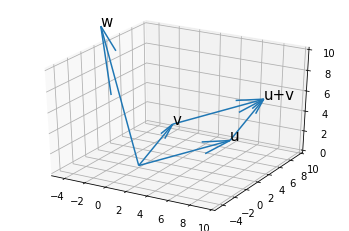

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

u=sp.Matrix([6,5,2])
v=sp.Matrix([1,4,3])

w=u.cross(v)
o3=sp.Matrix([0,0,0])

ax=ejes3d(-5,10,-5,10,0,10)
flecha3d(ax,juntar(u,v,u,v,w),juntar(o3,o3,v,u,o3),nombres=['u','v','u+v','','w'])
plt.show()

El área del paralelogramo en 3D es
$$\text{Área}=bh$$
Donde
* $b$ es la base, $b=|u|$.
* $h$ es la altura del paralelogramo $h=|v| \sin(\alpha)$

$$\text{Área} = |u||v| \sin(\alpha) = |u \times v|$$


El área de un paralelogramo en 2D es un caso particular del de 3D.
Sean $u=\begin{bmatrix}u_0\\u_1\\0\end{bmatrix}$ y  $v=\begin{bmatrix}v_0\\v_1\\0\end{bmatrix}$, entonces el área del paralelogramo es
$$\left| \ \begin{bmatrix}u_0\\u_1\\0\end{bmatrix} \times \begin{bmatrix}v_0\\v_1\\0\end{bmatrix} \ \right|
=\left| \ \begin{bmatrix}0\\0\\u_0 v_1 -u_1 v_0\end{bmatrix} \ \right|
=\text{abs}\left(u_0 v_1 -u_1 v_0\right)
=\text{abs}\left(\begin{vmatrix} u_0 & v_0 \\ u_1 & v_1 \end{vmatrix}\right)$$



# Volumen del paralelepípedo

https://www.geogebra.org/3d/qrpy7vcs

In [ ]:
from ubogsla18p import *

In [ ]:
A=mat('4 5 ; 4 3')
zeros(*A.shape)

Matrix([
[0, 0],
[0, 0]])

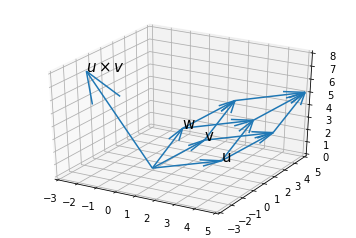

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


u=Matrix([3,1,1])
v=Matrix([1,3,1])
w=Matrix([1,1,3])
o=Matrix([0,0,0])
ax=ejes3d(-3,5,-3,5,0,8)
flecha3d(ax,
         juntar(u,v,u,v,u,v,u,v,w,w,w,w),
         juntar(o,o,v,u,o+w,o+w,v+w,u+w,o,v,u,u+v),
         nombres=['u','v','','','','','','','w','','',''])
flecha3d(ax,u.cross(v),nombres=r'$u \times v$')
plt.show()

Con el fin de generalizar el procedimiento para más de tres dimensiones, vamos a intentar repetir en tres dimensiones el procedimiento realizado con dos dimensiones.

Para hallar el área del paralelogramo, lo primero que se hizo fue obtener un vector perpendicular y con la magnitud de la base. En el caso del paralelepípedo debemos encontrar un vector $n$ perpendicular a la base del paralelepípedo y con la magnitud del área de la base, el cual corresponde al producto cruz $n=u \times v$.

El volumen del paralelepípedo está dado por
$$\text{Volumen}=Bh$$
Donde
* $B$ es el área de la base, $B=|u \times v|$.
* $h$ es la altura del paralelepípedo, que corresponde a la proyección de $w$ sobre $u \times v$, es decir $h=|w| \text{cos}(\alpha)$. Donde $\alpha$ es ángulo entre $w$ y $u \times v$.
$$\text{Volumen}=Bh=|u \times v||w| \text{cos}(\alpha)= (u \times v) \cdot w $$
Por lo tanto si el determinante de la matriz formada por  los vectores $u=\begin{bmatrix}u_0\\u_1\\u_2\end{bmatrix}$,  $v=\begin{bmatrix}v_0\\v_1\\v_2\end{bmatrix}$ y  $w=\begin{bmatrix}w_0\\w_1\\w_2\end{bmatrix}$ es el volumen del paralelepípedo tenemos que

$$
\begin{align}
\begin{vmatrix} u_0 & v_0 & w_0 \\ u_1 & v_1 & w_1 \\ u_2 & v_2 & w_2 \end{vmatrix}
&=\left(\begin{bmatrix} u_0 \\ u_1 \\ u_2  \end{bmatrix}
\times \begin{bmatrix}  v_0  \\  v_1  \\ v_2 \end{bmatrix}\right)
\cdot \begin{bmatrix} w_0 \\  w_1 \\  w_2 \end{bmatrix} \\
&=\begin{bmatrix}
\begin{vmatrix}u_1 & v_1 \\ u_2 & v_2 \end{vmatrix}\\
-\begin{vmatrix}u_0 & v_0 \\ u_2 & v_2 \end{vmatrix}\\
\begin{vmatrix}u_0 & v_0 \\ u_1 & v_1 \end{vmatrix}
\end{bmatrix} \cdot \begin{bmatrix} w_0 \\  w_1 \\  w_2 \end{bmatrix} \\
&=\begin{vmatrix}u_1 & v_1 \\ u_2 & v_2 \end{vmatrix}w_0
- \begin{vmatrix}u_0 & v_0 \\ u_2 & v_2 \end{vmatrix}w_1
+ \begin{vmatrix}u_0 & v_0 \\ u_1 & v_1 \end{vmatrix}w_2 & \text{(desarrollo por cofactores)}\\
&=(u_1v_2-u_2v_1)w_0 - (u_0v_2-u_2v_0)w_1 + (u_0v_1-u_1v_0)w_2\\
&=u_1v_2w_0-u_2v_1w_0 - u_0v_2w_1 + u_2v_0w_1 + u_0v_1w_2-u_1v_0w_2\\
\end{align}
$$

Observe que en el último resultado se presenta el determinante como la suma o resta de los todos productos que no repiten fila o columna. Para el determinante de $3 \times 3$ se puede utilizar el esquema de Sarrus.

<img src='https://raw.githubusercontent.com/GerardoMunoz/AlgLin_2025/main/imgs/AL_Sarrus.PNG'/>

# Resumen:


1.  **El vector cruzado**   de un vector $\vec{u}=\begin{bmatrix}u_0\\u_1\end{bmatrix}$ es un vector perpendicular con igual magnitud, definido así:
 $$\begin{bmatrix}u_0\\u_1\end{bmatrix}^\times:=\begin{bmatrix}u_1\\-u_0\end{bmatrix}$$
<!--Se puede verificar que $\vec{u}\cdot\vec{u}^\times==0$. Aunque es de resaltar que $\vec{u}^\times$ no es el único vector que cumple estas dos propiedad.-->

2. El área de un paralelogramo en 2D formado por los vectores $\vec{u}=\begin{bmatrix}u_0\\u_1\end{bmatrix}$,  $\vec{v}=\begin{bmatrix}v_0\\v_1\end{bmatrix}$ es:
$$
\begin{vmatrix}u_0 & v_0\\u_1 & v_1\end{vmatrix}=\begin{bmatrix}u_0\\u_1\end{bmatrix}\cdot\begin{bmatrix}v_0\\v_1\end{bmatrix}^\times=\begin{bmatrix}u_0\\u_1\end{bmatrix}\cdot\begin{bmatrix}v_1\\-v_0\end{bmatrix}=u_0 v_1 - u_1 v_0
$$

3. **El producto cruz** de los vectores $\vec{u}$ y $\vec{v}$ es un vector con dirección perpendicular a ambos y con magnitud igual al área del paralelogramo formado por los dos vectores, definido así:
$$
\begin{bmatrix}u_0\\u_1\\u_2\end{bmatrix} \times \begin{bmatrix}v_0\\v_1\\v_2\end{bmatrix}
=\begin{bmatrix}u_1 v_2- u_2v_1\\-( u_0 v_2 - u_2 v_0)\\u_0 v_1- u_1 v_0\end{bmatrix}
$$
<!--Se puede verificar que $\vec{u}\cdot(\vec{u}\times\vec{v})==0$, $\vec{v}\cdot(\vec{u}\times\vec{v})==0$. Aunque es de resaltar que $\vec{u}\times\vec{v}$ no es el único vector que cumple estas dos propiedad.-->



4. El área de un paralelogramo en 3D formado por los vectores $\vec{u}=\begin{bmatrix}u_0\\u_1\\u_2\end{bmatrix}$,  $\vec{v}=\begin{bmatrix}v_0\\v_1\\v_2\end{bmatrix}$ es:
$$
\left|\left| \begin{bmatrix}u_0\\u_1\\u_2\end{bmatrix} \times \begin{bmatrix}v_0\\v_1\\v_2\end{bmatrix}\right|\right|
=\left|\left|\begin{bmatrix}u_1 v_2- u_2v_1\\-( u_0 v_2 - u_2 v_0)\\u_0 v_1- u_1 v_0\end{bmatrix}\right|\right|
$$

5. El volumen de un paralelepipedo en 3D formado por los vectores $\vec{u}=\begin{bmatrix}u_0\\u_1\\u_2\end{bmatrix}$,  $\vec{v}=\begin{bmatrix}v_0\\v_1\\v_2\end{bmatrix}$, $\vec{w}=\begin{bmatrix}w_0\\w_1\\w_2\end{bmatrix}$ es:
$$
\begin{vmatrix}u_0 & v_0 & w_0\\u_1 & v_1 & w_1 \\u_2 & v_2 & w_2 \end{vmatrix}=\begin{bmatrix}u_0\\u_1\\u_2\end{bmatrix}\cdot\left(\begin{bmatrix}u_0\\u_1\\u_2\end{bmatrix} \times \begin{bmatrix}v_0\\v_1\\v_2\end{bmatrix}\right)
$$
